In [3]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
from PIL             import Image, ImageFilter , ImageOps
from skimage.filters import threshold_otsu
from skimage         import filters , feature
%matplotlib inline

# Boxcounting Method

La idea basica del algoritmo es la siguiente:

- Convertir las imagenes en blanco y negro usando la funcion convert de PIL
- Devidir la imagen en N cuadrados e ir iterando los N desde 1 hasta 1000
- Contar los cuadrados que tengan algun pixel diferente de 0

## Helecho

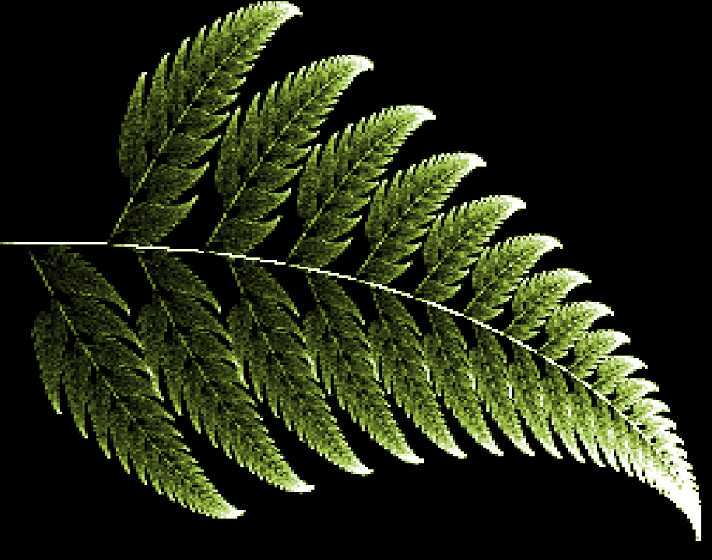

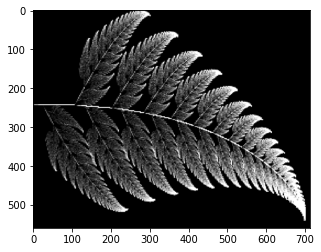

In [4]:
imagen_cargada = Image.open("Helecho.gif")
imagen_cargada_b_w = imagen_cargada.convert('RGBA').convert('L')
plt.imshow(imagen_cargada_b_w , cmap=plt.cm.gray)
imagen_cargada

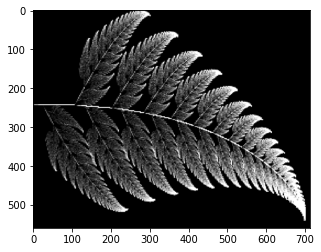

In [5]:
plt.imshow(imagen_cargada_b_w , cmap=plt.cm.gray)
plt.savefig('Helecho_bw.png')

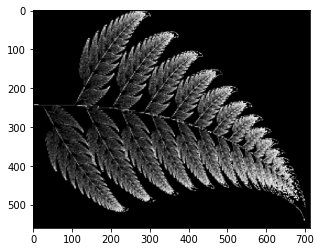

In [6]:
imagen_tratada = np.where(np.array(imagen_cargada_b_w)==255,0, np.array(imagen_cargada_b_w))
plt.imshow(imagen_tratada,cmap=plt.cm.gray)

## Helecho Blanco y Negro

## Division de Helecho

280 356


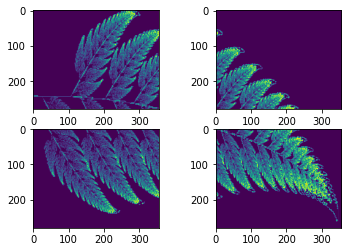

In [7]:
image_black_array = np.array(imagen_tratada)
xs = image_black_array.shape[0]//2  # division lines for the picture
ys = image_black_array.shape[1]//2
# now slice up the image (in a shape that works well with subplots)
print(xs, ys)

splits = [[image_black_array[0:xs, 0:ys], image_black_array[0:xs, ys:]], [image_black_array[xs:, 0:ys], image_black_array[xs:, ys:]]]

fig, axs = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        axs[i][j].imshow(splits[i][j])

# Funciones 

In [8]:
def convert_to_black(imagen):
    imagen_original  = Image.open(imagen)
    imagen_cargada_b_w = imagen_original.convert('RGBA').convert('L')
    imagen_tratada = np.where(np.array(imagen_cargada_b_w)==255,0, np.array(imagen_cargada_b_w))
    return imagen_tratada

In [9]:
def matrix_devided_by_number(array , n = 3):
    x_max,y_max     = array.shape[0] , array.shape[1]
    (xs,ys) = np.max([x_max//n,1]) , np.max([y_max//n,1]) 
    #print(xs,ys)
    matriz_partes = [ [array[i:i+xs, j:j+ys] for j in range(0,y_max,ys) ] for i in range(0,x_max,xs)]
    return matriz_partes

In [38]:
def plot_matrix_devided(array , n):
    fig, axs = plt.subplots(n, n)
    for i in range(n):
        for j in range(n):
            #print(array[i][j].shape)
            axs[i][j].imshow(array[i][j],cmap=plt.cm.gray)
            axs[i][j].axis('off')

## Prueba Funcionamiento division

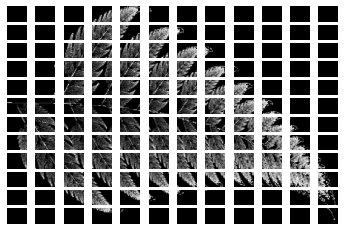

In [40]:
image_black_array          = convert_to_black('Helecho.gif')
salida                     = matrix_devided_by_number(image_black_array , 12)
plot_matrix_devided(salida, 12)
#plt.axis('off')
plt.savefig('Helecho_dividido_12.png')

## Funcion box_counting

Basicamente la idea es contar por cada matriz , realizar la suma y verificar que la suma de los elementos den 0



In [17]:
def box_counting(array):
    return np.sum([elemento.sum()>0 for lista in array for elemento in lista ])

In [16]:
def box_counting_iterative(imagen='Helecho.gif'):
    data = pd.DataFrame([],columns=['Valor','Cajas','Size'])
    image_black_white = convert_to_black(imagen)
    image_black_array = np.array(image_black_white)
    size = image_black_array[0].shape[0]
    for i in range(1,200,5):
        salida = matrix_devided_by_number(image_black_array , i)
        data    = data.append({'Valor':box_counting(salida),'Cajas':i , 'Size':size/i}, ignore_index=True )
    return data

## Prueba Funcionamiento Box_counting

In [20]:
data

,Valor,Cajas,Size
0,1.0,1.0,2000.000000
1,29.0,6.0,333.333333
2,67.0,11.0,181.818182
3,110.0,16.0,125.000000
4,193.0,21.0,95.238095
5,259.0,26.0,76.923077
6,362.0,31.0,64.516129
7,433.0,36.0,55.555556
8,584.0,41.0,48.780488
9,688.0,46.0,43.478261


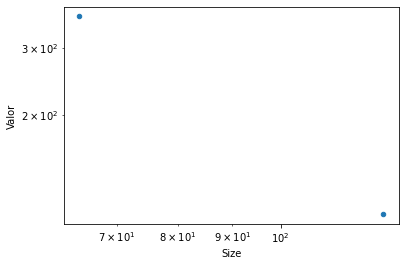

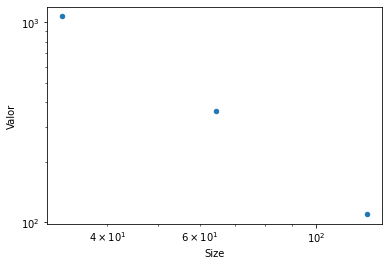

In [41]:
data = box_counting_iterative('SIER_1.png')
data[(data.index==3) | (data.index==6)].plot.scatter(x='Size',y='Valor',logx=True,logy=True)
data[(data.index==3) | (data.index==6) | (data.index==12)].plot.scatter(x='Size',y='Valor',logx=True,logy=True)
#
#data[data.index==6]
plt.savefig('SIER_1_3.pgf')

In [21]:
def plotear_grafica(data,ejex='Size',ejey='Valor'):
    data.reset_index().plot.scatter(x=ejex,y=ejey,label='Datos')

# Funcion ajuste de curvas

In [13]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * np.power(x,-b)

In [18]:
data  = box_counting_iterative('SIER_1.png')
xdata = data['Size']
ydata = data['Valor']
popt, pcov = curve_fit(func, xdata ,ydata )

In [19]:
popt

array([2.66941114e+05, 1.58394319e+00])

# Resultados

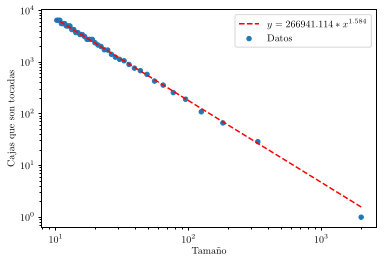

In [36]:
plotear_grafica(data)
(a,b) = tuple(popt)
plt.xlabel('Tamaño')
plt.ylabel('Cajas que son tocadas')
plt.yscale('log')
plt.xscale('log')
plt.plot(xdata, func(np.float_(xdata), a,b), 'r--',label="$y=%5.3f*x^{%5.3f}$"% tuple(popt))
plt.legend()
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
plt.savefig('presentation/SIER_1.pgf')


In [17]:
tuple(popt)

(957734.6307084754, 2.091785327812594)